In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("../data/Default.csv")
df

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879
...,...,...,...,...
9995,0,0,711.555020,52992.378914
9996,0,0,757.962918,19660.721768
9997,0,0,845.411989,58636.156984
9998,0,0,1569.009053,36669.112365


In [3]:
X = df[["student", "balance", "income"]]
y = df["default"]
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [4]:
model.intercept_, model.coef_

(array([-10.9018116]),
 array([[-6.12564507e-01,  5.73060606e-03,  3.96189924e-06]]))

In [5]:
x = pd.DataFrame({"student": [1, 0], "balance": [2000, 2000], "income": [10000, 10000]})

In [6]:
model.predict(x)

array([0, 1])

In [7]:
default_prob = model.predict_proba(x)[:, 1]
(default_prob > 0.5).astype(int)

array([0, 1])

In [8]:
all((model.predict_proba(X)[:, 1] > 0.5).astype(int) == model.predict(X))

True

#### Example: Credit card default prediction

- We want to predict whether a customers will default on their credit card debt based on income, monthly balance, and studentness.

- We model a customer defaulting using the **logistic regression model**:
  $$
  y\sim \operatorname{Bernoulli}\big(\texttt{default}\mid p\big),
  $$
  where
  $$
  \log\left(\frac p{1-p}\right) = a + b\,\texttt{income}+c\,\texttt{balance} + d\,\texttt{student}
  $$


#### Interpreting the coefficient of a binary feature in a logistic regression model

- Odds of defaulting:&nbsp;
  $\displaystyle{{o} = \frac{p}{1-p}}$
- From the logistic regression model:

  $$
  \begin{aligned}
  \log\frac{o_{\text{student}}}
  {o_{\text{nonstudent}}} &=
  \log\left(\frac{p_{\text{student}}}{1-p_{\text{student}}}\right) - \log\left(\frac{p_{\text{nonstudent}}}{1-p_{\text{nonstudent}}}\right)\\
  &= \phantom{-}(a + b\,\texttt{income}+c\,\texttt{balance} + d\,(1))\\&\phantom{=}-(a + b\,\texttt{income}+c\,\texttt{balance} + d\,(0))\\
  &= d\\
  \frac{o_{\text{student}}}{o_{\text{nonstudent}}} &= e^{d}\approx 0.54
  \end{aligned}
  $$

- **_The odds of a student defaulting are roughly half those of a nonstudent with comparable income and balance._**


In [9]:
df = pd.read_csv("../data/Default.csv")

X = df[["income", "balance", "student"]]
y = df["default"]
model = LogisticRegression()
model.fit(X, y)

a = model.intercept_
b, c, d = model.coef_.squeeze()

assert np.exp(d).round(2) == 0.54  # See "interpretation" markdown cell.

In [10]:
x = pd.DataFrame(
    {
        "income": [10000, 10000],
        "balance": [2000, 2000],
        "student": [1, 0],
    }
)
x

,income,balance,student
0,10000,2000,1
1,10000,2000,0


In [11]:
model.predict_proba(x)

array([[0.50338619, 0.49661381],
       [0.35456804, 0.64543196]])

In [12]:
p_student = model.predict_proba(x)[0, 1]
p_nonstudent = model.predict_proba(x)[1, 1]

o_student = p_student / (1 - p_student)
o_nonstudent = p_nonstudent / (1 - p_nonstudent)

assert np.isclose(np.log(o_student / o_nonstudent), d)

- Let's compare risk of default for student versus nonstudent cardholders with incomes of $10000 for a range of balances.

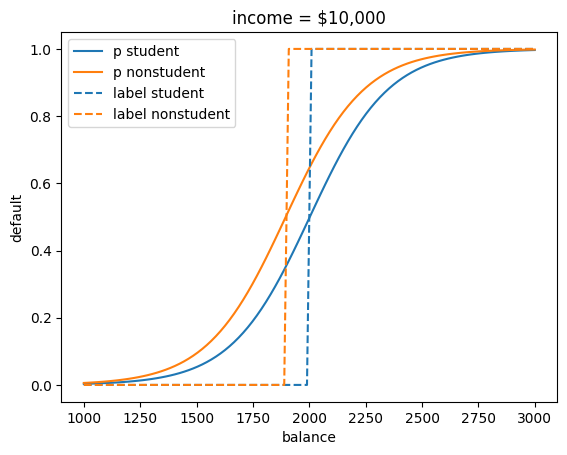

In [13]:
balance = np.linspace(1000, 3000, 100)

x_student = pd.DataFrame(
    {
        "income": [10000 for _ in balance],
        "balance": balance,
        "student": [1 for _ in balance],
    }
)

x_nonstudent = pd.DataFrame(
    {
        "income": [10000 for _ in balance],
        "balance": balance,
        "student": [0 for _ in balance],
    }
)

p_student = model.predict_proba(x_student)[:, 1]
p_nonstudent = model.predict_proba(x_nonstudent)[:, 1]

plt.plot(balance, p_student, label="p student")
plt.plot(balance, p_nonstudent, label="p nonstudent")

plt.plot(balance, p_student > 0.5, "--C0", label="label student")
plt.plot(balance, p_nonstudent > 0.5, "--C1", label="label nonstudent")

plt.title("income = $10,000")
plt.xlabel("balance")
plt.ylabel("default")
plt.legend()
plt.show()

### log-loss

In [14]:
from sklearn.metrics import log_loss

p = model.predict_proba(X)[:, 1]

train_loss = log_loss(y, p)
assert np.isclose(train_loss, -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p)))

In [15]:
Y = (y.to_numpy().reshape(-1, 1) == np.array([[0, 1]])).astype(int)

In [16]:
Y

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [17]:
log_p = model.predict_log_proba(X)
log_p

array([[-1.43564040e-03, -6.54686199e+00],
       [-1.13169392e-03, -6.78460552e+00],
       [-9.76692617e-03, -4.63363297e+00],
       ...,
       [-2.94910692e-03, -5.82772709e+00],
       [-1.57994274e-01, -1.92315375e+00],
       [-3.37618939e-05, -1.02961947e+01]])

In [18]:
-np.mean((Y * log_p).sum(axis=1))

0.07857828941377155

### Fake data

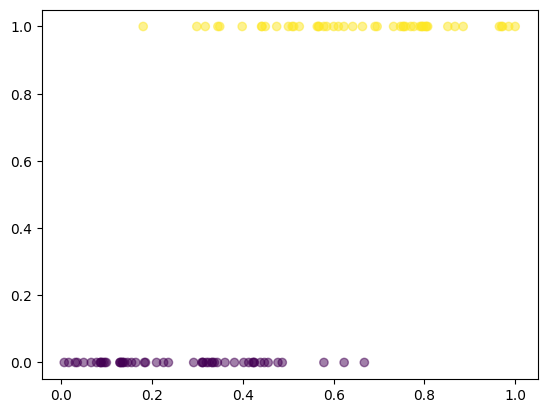

In [19]:
from scipy.special import expit

a = -5
b = 10

rng = np.random.default_rng()


def make_data(n):
    x = rng.uniform(size=n)
    p = expit(a + b * x)
    y = rng.uniform(size=n) < p
    return x, y


x, y = make_data(100)

plt.scatter(x, y, c=y, alpha=0.5)
plt.show()

In [20]:
X = x.reshape(-1, 1)
model = LogisticRegression(max_iter=10000, tol=0.000001, penalty=None)
model.fit(X, y)
ahat, bhat = model.intercept_.item(), model.coef_.item()
ahat, bhat

(-4.8397807215662745, 10.668331172055774)

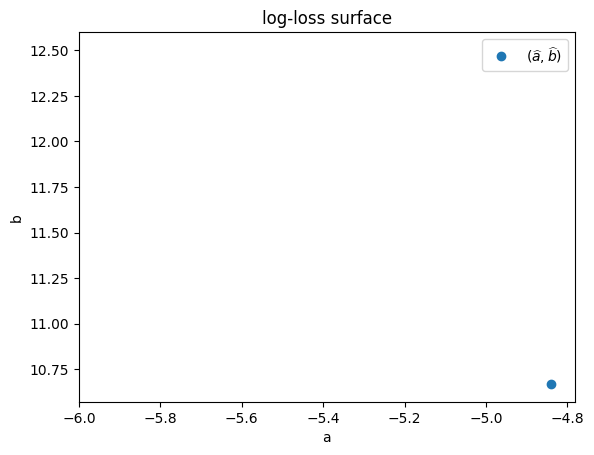

In [21]:
X = x.reshape(-1, 1, 1)
Y = y.astype(int).reshape((-1, 1, 1))

a = np.linspace(-6.0, -5.5, 100)
b = np.linspace(11.6, 12.6, 100)
A, B = np.meshgrid(a, b)
P = expit(A + B * X)

# log loss
loss = -np.mean(Y * np.log(P) + (1 - Y) * np.log(1 - P), axis=0)

plt.contour(
    A,
    B,
    loss,
    levels=[0.2646, 0.2647, 0.2648, 0.2649, 0.2650],
)
plt.plot(ahat, bhat, "o", label="$(\\widehat{{a}}, \\widehat{{b}})$")
plt.xlabel("a")
plt.ylabel("b")
plt.legend()
plt.title("log-loss surface")
plt.show()

In [22]:
import statsmodels.api as sm

In [23]:
X = np.ones((len(x), 2))
X[:, 1] = x
fit = sm.Logit(y, X).fit()
fit.summary()

Optimization terminated successfully.
         Current function value: 0.334998
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Fri, 07 Mar 2025   Pseudo R-squ.:                  0.5161
Time:                        14:21:22   Log-Likelihood:                -33.500
converged:                       True   LL-Null:                       -69.235
Covariance Type:            nonrobust   LLR p-value:                 2.815e-17
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.8398      0.974     -4.968      0.000      -6.749      -2.930
x1            10.6683      2.093      5.097      0.000       6.566      14.771
==============================================================================
"""

In [24]:
import bambi as bmb
import arviz as az

In [25]:
df = pd.DataFrame({"x": x, "y": y})
model = bmb.Model("y ~ x", df, family="bernoulli")
model

       Formula: y ~ x
        Family: bernoulli
          Link: p = logit
  Observations: 100
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 1.5)
            x ~ Normal(mu: 0.0, sigma: 3.6946)

In [26]:
fit = model.fit()

Modeling the probability that y==1
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, x]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


In [27]:
az.summary(fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-4.057,0.761,-5.480,-2.697,0.012,0.009,3903.0,2816.0,1.0
x,8.899,1.562,6.136,11.871,0.026,0.019,3781.0,2793.0,1.0


In [28]:
df = pd.read_csv("../data/2024CFLScores.csv")
df = df[df["week"].str.startswith("Week")]
df = df[df["host_score"] != df["visitor_score"]]
df

,week,visitor,host,visitor_score,host_score
9,Week 1,MTL,WPG,27,12
10,Week 1,HAM,CGY,24,32
11,Week 1,SSK,EDM,29,21
12,Week 1,BC,TOR,27,35
13,Week 2,WPG,OTT,19,23
...,...,...,...,...,...
85,Week 20,MTL,BC,3,27
86,Week 21,HAM,OTT,31,37
87,Week 21,TOR,EDM,30,31
88,Week 21,WPG,MTL,28,27


In [29]:
teams = set(df["host"])
teams

{'BC', 'CGY', 'EDM', 'HAM', 'MTL', 'OTT', 'SSK', 'TOR', 'WPG'}

In [30]:
intercept = pd.Series(np.ones(len(df), dtype=int), name="intercept", index=df.index)
X = pd.DataFrame({"INTERCEPT": intercept})
for team in teams:
    if team != "CGY":
        X[team] = (df["host"] == team).astype(int) - (df["visitor"] == team).astype(int)
y = df["host_score"] > df["visitor_score"]
X

,INTERCEPT,EDM,SSK,WPG,MTL,HAM,OTT,TOR,BC
9,1,0,0,1,-1,0,0,0,0
10,1,0,0,0,0,-1,0,0,0
11,1,1,-1,0,0,0,0,0,0
12,1,0,0,0,0,0,0,1,-1
13,1,0,0,-1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
85,1,0,0,0,-1,0,0,0,1
86,1,0,0,0,0,-1,1,0,0
87,1,1,0,0,0,0,0,-1,0
88,1,0,0,-1,1,0,0,0,0


In [31]:
fit = sm.Logit(y, X).fit()
fit.summary()

Optimization terminated successfully.
         Current function value: 0.613740
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   79
Model:                          Logit   Df Residuals:                       70
Method:                           MLE   Df Model:                            8
Date:                Fri, 07 Mar 2025   Pseudo R-squ.:                 0.08371
Time:                        14:21:29   Log-Likelihood:                -48.485
converged:                       True   LL-Null:                       -52.915
Covariance Type:            nonrobust   LLR p-value:                    0.3543
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
INTERCEPT      0.4734      0.246      1.922      0.055      -0.009       0.956
EDM            0.4202      0.689      0.610      0.542      -0.929       1.770
SSK            0.9912      0.720      1.377      0.169      -0.420       2.403
WPG            1.3657      0.727      1.877      0.060      -0.060       2.791
MTL            1.8167      0.783      2.321      0.020       0.283       3.351
HAM            0.4861      0.713      0.682      0.495      -0.911       1.883
OTT            1.0779      0.732      1.473      0.141      -0.356       2.512
TOR            1.1607      0.720      1.612      0.107      -0.250       2.572
BC             0.8943      0.702      1.275      0.202      -0.481       2.270
==============================================================================
"""

In [32]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty=None, tol=0.0000001)
model.fit(X.drop(columns=["INTERCEPT"]), y)
coef_ = pd.Series(model.coef_.squeeze(), index=model.feature_names_in_, name="coef_")
print(coef_)
print(model.intercept_.item())

EDM    0.420187
SSK    0.991243
WPG    1.365688
MTL    1.816699
HAM    0.486129
OTT    1.077901
TOR    1.160717
BC     0.894312
Name: coef_, dtype: float64
0.4733869202273318


In [33]:
host_victory = df["host_score"] > df["visitor_score"]
X = pd.DataFrame({"host_victory": host_victory})
for team in teams:
    if team != "CGY":
        X[team] = (df["host"] == team).astype(int) - (df["visitor"] == team).astype(int)
X

,host_victory,EDM,SSK,WPG,MTL,HAM,OTT,TOR,BC
9,False,0,0,1,-1,0,0,0,0
10,True,0,0,0,0,-1,0,0,0
11,False,1,-1,0,0,0,0,0,0
12,True,0,0,0,0,0,0,1,-1
13,True,0,0,-1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
85,True,0,0,0,-1,0,0,0,1
86,True,0,0,0,0,-1,1,0,0
87,True,1,0,0,0,0,0,-1,0
88,False,0,0,-1,1,0,0,0,0


In [34]:
model = bmb.Model(
    "host_victory ~ 1 + WPG + EDM + TOR + SSK + MTL + BC + OTT + HAM",
    X,
    family="bernoulli",
)
model

       Formula: host_victory ~ 1 + WPG + EDM + TOR + SSK + MTL + BC + OTT + HAM
        Family: bernoulli
          Link: p = logit
  Observations: 79
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 1.5)
            WPG ~ Normal(mu: 0.0, sigma: 2.095)
            EDM ~ Normal(mu: 0.0, sigma: 2.095)
            TOR ~ Normal(mu: 0.0, sigma: 2.095)
            SSK ~ Normal(mu: 0.0, sigma: 2.1565)
            MTL ~ Normal(mu: 0.0, sigma: 2.1565)
            BC ~ Normal(mu: 0.0, sigma: 2.095)
            OTT ~ Normal(mu: 0.0, sigma: 2.1565)
            HAM ~ Normal(mu: 0.0, sigma: 2.095)

In [35]:
fit = model.fit()

Modeling the probability that host_victory==1
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, WPG, EDM, TOR, SSK, MTL, BC, OTT, HAM]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.


In [36]:
az.summary(fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.501,0.262,0.025,1.017,0.004,0.003,4303.0,2752.0,1.0
WPG,1.070,0.652,-0.110,2.349,0.013,0.009,2383.0,2844.0,1.0
EDM,0.106,0.618,-1.057,1.286,0.012,0.009,2502.0,2959.0,1.0
TOR,0.849,0.634,-0.359,2.006,0.013,0.009,2368.0,3189.0,1.0
SSK,0.675,0.654,-0.579,1.932,0.013,0.009,2518.0,2819.0,1.0
MTL,1.515,0.691,0.205,2.773,0.014,0.010,2601.0,3005.0,1.0
BC,0.588,0.618,-0.571,1.701,0.013,0.009,2359.0,3091.0,1.0
OTT,0.769,0.660,-0.513,1.951,0.013,0.009,2578.0,3360.0,1.0
HAM,0.160,0.647,-0.959,1.472,0.013,0.009,2581.0,2831.0,1.0


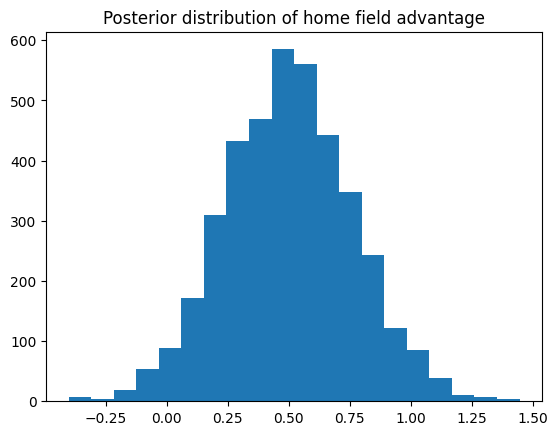

In [37]:
hfa = np.array(fit.posterior.Intercept).ravel()
plt.hist(hfa, bins=20)
plt.title("Posterior distribution of home field advantage")
plt.show()

In [38]:
np.mean(hfa > 0)

0.9725

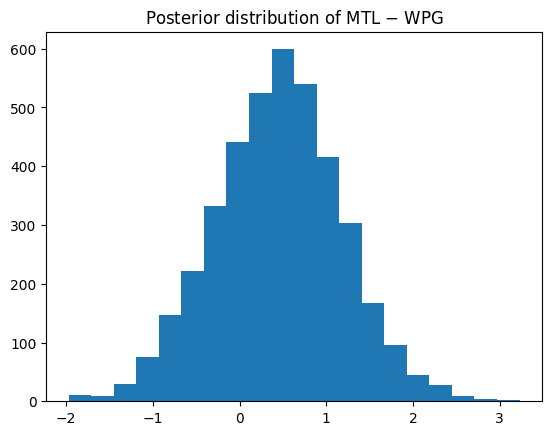

In [39]:
mtl = np.array(fit.posterior.MTL).ravel()
wpg = np.array(fit.posterior.WPG).ravel()

plt.hist(mtl - wpg, bins=20)
plt.title("Posterior distribution of MTL $-$ WPG")
plt.show()

In [40]:
np.mean(mtl > wpg)

0.7315

In [41]:
np.mean(mtl > wpg + hfa)

0.48675

In [42]:
np.mean(mtl + hfa > wpg)

0.88525

### Interactions in logistic regression models

In [43]:
df = pd.DataFrame(bmb.load_data("ANES"))
df

,vote,age,party_id
0,clinton,56,democrat
1,trump,65,republican
2,clinton,80,democrat
3,trump,38,republican
4,trump,60,republican
...,...,...,...
416,trump,46,independent
417,clinton,64,democrat
418,someone_else,31,independent
419,clinton,39,democrat


In [44]:
df["vote"].value_counts()

vote
clinton         215
trump           158
someone_else     48
Name: count, dtype: int64

In [45]:
df["party_id"].value_counts()

party_id
democrat       186
independent    138
republican      97
Name: count, dtype: int64

In [ ]:
y = df["vote"] = df["vote"] == "clinton"
X = df[["age"]].copy()
X["democrat"] = df["party_id"] == "democrat"
X["independent"] = df["party_id"] == "independent"
X["republican"] = df["party_id"] == "republican"
X["age:democrat"] = X["age"] * X["democrat"]
X["age:independent"] = X["age"] * X["independent"]
X["age:republican"] = X["age"] * X["republican"]
X["Intercept"] = 1.0
X = X.drop(columns=["age", "democrat"]).astype(float)
X

,independent,republican,age:democrat,age:independent,age:republican,Intercept
0,0.0,0.0,56.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,65.0,1.0
2,0.0,0.0,80.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,38.0,1.0
4,0.0,1.0,0.0,0.0,60.0,1.0
...,...,...,...,...,...,...
416,1.0,0.0,0.0,46.0,0.0,1.0
417,0.0,0.0,64.0,0.0,0.0,1.0
418,1.0,0.0,0.0,31.0,0.0,1.0
419,0.0,0.0,39.0,0.0,0.0,1.0


In [47]:
fit = sm.Logit(y, X).fit()
fit.summary()

Optimization terminated successfully.
         Current function value: 0.432519
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   vote   No. Observations:                  421
Model:                          Logit   Df Residuals:                      415
Method:                           MLE   Df Model:                            5
Date:                Fri, 07 Mar 2025   Pseudo R-squ.:                  0.3758
Time:                        14:21:35   Log-Likelihood:                -182.09
converged:                       True   LL-Null:                       -291.72
Covariance Type:            nonrobust   LLR p-value:                 2.144e-45
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
independent        -0.7496      0.800     -0.936      0.349      -2.319       0.819
republican         -0.6985      1.648     -0.424      0.672      -3.928       2.531
age:democrat        0.0103      0.012      0.841      0.400      -0.014       0.034
age:independent    -0.0225      0.011     -2.113      0.035      -0.043      -0.002
age:republican     -0.0815      0.040     -2.023      0.043      -0.161      -0.003
Intercept           1.2901      0.599      2.154      0.031       0.116       2.464
===================================================================================
"""

In [48]:
from formulae import design_matrices

mats = design_matrices("vote[clinton] ~ party_id + age:party_id", df)

X = mats.common.as_dataframe()
y = np.array(mats.response)

In [58]:
fit = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.432519
         Iterations 8


In [ ]:
age = np.arange(df["age"].min(), df["age"].max() + 1)
party_id = [
    *["democrat" for _ in age],
    *["independent" for _ in age],
    *["republican" for _ in age],
]
len(party_id)
df_new = pd.DataFrame({"age": [*age, *age, *age], "party_id": party_id})

X_new = design_matrices("party_id + party_id:age", df_new).common.as_dataframe()
X_new

,Intercept,party_id[independent],party_id[republican],party_id[democrat]:age,party_id[independent]:age,party_id[republican]:age
0,1.0,0.0,0.0,19.0,0.0,0.0
1,1.0,0.0,0.0,20.0,0.0,0.0
2,1.0,0.0,0.0,21.0,0.0,0.0
3,1.0,0.0,0.0,22.0,0.0,0.0
4,1.0,0.0,0.0,23.0,0.0,0.0
...,...,...,...,...,...,...
226,1.0,0.0,1.0,0.0,0.0,91.0
227,1.0,0.0,1.0,0.0,0.0,92.0
228,1.0,0.0,1.0,0.0,0.0,93.0
229,1.0,0.0,1.0,0.0,0.0,94.0


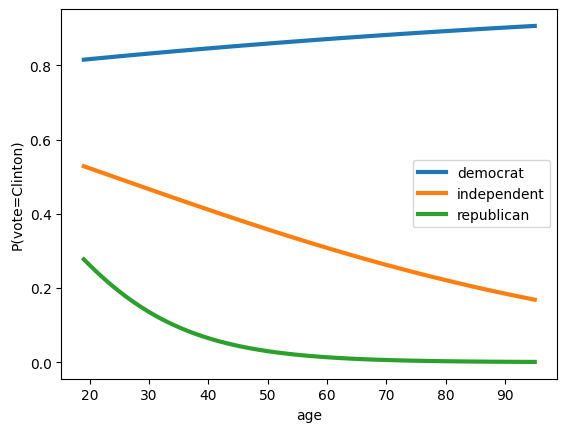

In [75]:
y_new = fit.predict(X_new)

for i, party_id in enumerate(["democrat", "independent", "republican"]):
    plt.plot(age, y_new.loc[df_new["party_id"] == party_id], lw=3, label=party_id)
plt.legend()
plt.xlabel("age")
plt.ylabel("P(vote=Clinton)")
plt.show()

In [78]:
df = pd.DataFrame(bmb.load_data("ANES"))
model = bmb.Model("vote[clinton] ~ party_id + party_id:age", df, family="bernoulli")
fit = model.fit()

Modeling the probability that vote==clinton
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, party_id, party_id:age]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.


In [86]:
model.predict(fit, data=df_new)

In [87]:
fit.posterior

<xarray.Dataset> Size: 8MB
Dimensions:           (chain: 4, draw: 1000, party_id_dim: 2,
                       party_id:age_dim: 3, __obs__: 231)
Coordinates:
  * chain             (chain) int64 32B 0 1 2 3
  * draw              (draw) int64 8kB 0 1 2 3 4 5 6 ... 994 995 996 997 998 999
  * party_id_dim      (party_id_dim) <U11 88B 'independent' 'republican'
  * party_id:age_dim  (party_id:age_dim) <U11 132B 'democrat' ... 'republican'
  * __obs__           (__obs__) int64 2kB 0 1 2 3 4 5 ... 226 227 228 229 230
Data variables:
    Intercept         (chain, draw) float64 32kB 0.7166 0.6987 ... 1.404 0.2326
    party_id          (chain, draw, party_id_dim) float64 64kB 0.3073 ... 0.8061
    party_id:age      (chain, draw, party_id:age_dim) float64 96kB 0.0192 ......
    p                 (chain, draw, __obs__) float64 7MB 0.7468 ... 0.0001317
Attributes:
    created_at:                  2025-03-07T21:38:40.587365+00:00
    arviz_version:               0.20.0
    inference_library:           pymc
    inference_library_version:   5.20.0
    sampling_time:               5.340717077255249
    tuning_steps:                1000
    modeling_interface:          bambi
    modeling_interface_version:  0.15.0

In [89]:
p = fit.posterior["p"]
p.shape

(4, 1000, 231)

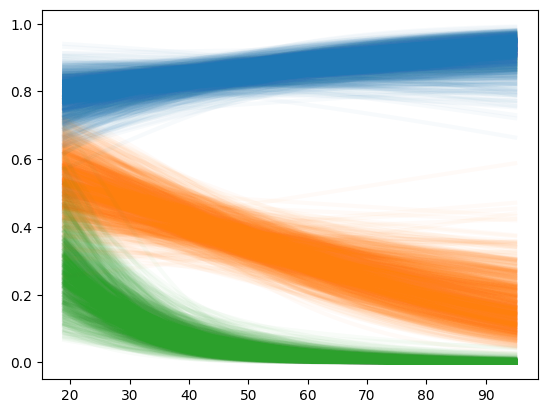

In [ ]:
for j in range(1000):
    for i, party_id in enumerate(["democrat", "independent", "republican"]):
        plt.plot(age, p[0, j, i * 77 : (i + 1) * 77], lw=3, alpha=0.03, color=f"C{i}")

In [99]:
model

       Formula: vote[clinton] ~ party_id + party_id:age
        Family: bernoulli
          Link: p = logit
  Observations: 421
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 1.5)
            party_id ~ Normal(mu: [0. 0.], sigma: [1. 1.])
            party_id:age ~ Normal(mu: [0. 0. 0.], sigma: [0.0586 0.0586 0.0586])
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()

### Logistic regression with $k\geq 2$ classes

In [2]:
from sklearn.datasets import load_iris

In [3]:
X, y = load_iris(return_X_y=True, as_frame=True)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
y.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [6]:
import statsmodels.api as sm

fit = sm.MNLogit(X, y).fit()
fit.summary()

/Users/mgreenbe/DATA335W2025/.venv/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:3059: RuntimeWarning: divide by zero encountered in log
  logprob = np.log(self.cdf(np.dot(self.exog,params)))


         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

In [17]:
yy = y[y != 2]
XX = X[y != 2]

In [ ]:
fit = sm.Logit(yy, XX).fit()
fit.summary()

         Current function value: 0.000009
         Iterations: 35


/Users/mgreenbe/DATA335W2025/.venv/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/mgreenbe/DATA335W2025/.venv/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/mgreenbe/DATA335W2025/.venv/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/mgreenbe/DATA335W2025/.venv/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identif

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  100
Model:                          Logit   Df Residuals:                       96
Method:                           MLE   Df Model:                            3
Date:                Mon, 10 Mar 2025   Pseudo R-squ.:                   1.000
Time:                        14:08:39   Log-Likelihood:            -0.00091251
converged:                      False   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 7.471e-30
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
sepal length (cm)    -1.9877     78.708     -0.025      0.980    -156.252     152.276
sepal width (cm)     -4.6555     99.388     -0.047      0.963    -199.453     190.142
petal length (cm)     5.1771    169.916      0.030      0.976    -327.852     338.206
petal width (cm)     16.2428    383.926      0.042      0.966    -736.238     768.723
=====================================================================================

Possibly complete quasi-separation: A fraction 0.97 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [41]:
df = pd.read_csv("../data/alligators.csv")
df["is_male"] = df["sex"] == "Male"
df["Intercept"] = 1
df

,choice,sex,length,is_male,Intercept
0,I,Male,1.30,True,1
1,F,Male,1.32,True,1
2,F,Male,1.32,True,1
3,F,Male,1.40,True,1
4,I,Male,1.42,True,1
...,...,...,...,...,...
58,O,Female,2.56,False,1
59,F,Female,2.67,False,1
60,I,Female,2.72,False,1
61,F,Female,2.79,False,1


In [42]:
df["choice"].value_counts()

choice
F    33
I    20
O    10
Name: count, dtype: int64

In [43]:
model = LogisticRegression(penalty=None)
model.fit(df[["is_male", "length"]], df["choice"])

LogisticRegression(penalty=None)

In [44]:
from sklearn.metrics import accuracy_score

accuracy_score(df["choice"], model.predict(df[["is_male", "length"]]))

0.6507936507936508

In [45]:
model.intercept_

array([-1.29313891,  4.35868502, -3.06554611])

In [46]:
model.coef_

array([[ 0.18721889,  0.93671723],
       [-0.93628667, -1.99197295],
       [ 0.74906777,  1.05525573]])

In [ ]:
length = np.linspace(df["length"].min(), df["length"].max(), 100)
df_test = pd.DataFrame(
    {
        "is_male": [*[True for _ in length], *[False for _ in length]],
        "length": [*length, *length],
        "Intercept": 1.0,
    }
)

In [55]:
p = model.predict_proba(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Intercept


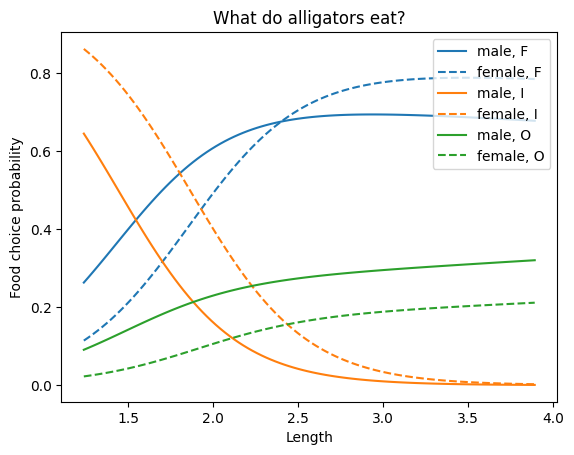

In [56]:
for j in range(3):
    plt.plot(length, p[:100, j], f"C{j}", label=f"male, {model.classes_[j]}")
    plt.plot(length, p[100:, j], f"C{j}--", label=f"female, {model.classes_[j]}")

plt.legend(loc="upper right")

plt.ylabel("Food choice probability")
plt.xlabel("Length")

plt.title("What do alligators eat?")
plt.show()

In [57]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
# yy = label_encoder.fit_transform(y)

fit = sm.MNLogit(
    df["choice"], df[["is_male", "length", "Intercept"]].to_numpy(dtype=float)
).fit()
fit.summary()

Optimization terminated successfully.
         Current function value: 0.835253
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                 choice   No. Observations:                   63
Model:                        MNLogit   Df Residuals:                       57
Method:                           MLE   Df Model:                            4
Date:                Mon, 10 Mar 2025   Pseudo R-squ.:                  0.1606
Time:                        14:46:15   Log-Likelihood:                -52.621
converged:                       True   LL-Null:                       -62.692
Covariance Type:            nonrobust   LLR p-value:                 0.0004681
==============================================================================
  choice=I       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.1211      0.728     -1.540      0.124      -2.548       0.306
x2            -2.9274      0.936     -3.126      0.002      -4.763      -1.092
const          5.6481      1.898      2.976      0.003       1.929       9.367
------------------------------------------------------------------------------
  choice=O       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5620      0.877      0.641      0.522      -1.157       2.281
x2             0.1184      0.584      0.203      0.839      -1.025       1.262
const         -1.7718      1.706     -1.038      0.299      -5.116       1.573
==============================================================================
"""

In [58]:
fit.params

,0,1
x1,-1.121122,0.562018
x2,-2.927401,0.118370
const,5.648105,-1.771822


$$
\begin{aligned}
\log\frac{p(y=1)}{p(y=0)} &= X\beta_1\\
\log\frac{p(y=2)}{p(y=0)} &= X\beta_2\\
\end{aligned}
$$

$$
\begin{aligned}
p(y=1) &= p(y=0)e^{X\beta_1}\\
p(y=2) &= p(y=0)e^{X\beta_2}
\end{aligned}
$$

$$
1 = p(y=0) + p(y=1) + p(y=2) = p(y=0)(1 + e^{X\beta_1} + e^{X\beta_2})
$$

$$
p(y=0) = \frac1{1 + e^{X\beta_1} + e^{X\beta_2}}
$$

Set $\beta_0=0$. Then
$$
p(y=i) = \frac{e^{X\beta_i}}{e^{X\beta_0}+e^{X\beta_1}+e^{X\beta_2}}
$$

In [65]:
X_test = df_test[["is_male", "length", "Intercept"]].to_numpy(dtype=float)

V = np.zeros((len(X_test), 3))
V[:, 1:] = (X_test @ fit.params).to_numpy()
W = np.exp(V)
W = W / W.sum(axis=1, keepdims=True)

assert np.allclose(W, fit.predict(X_test))

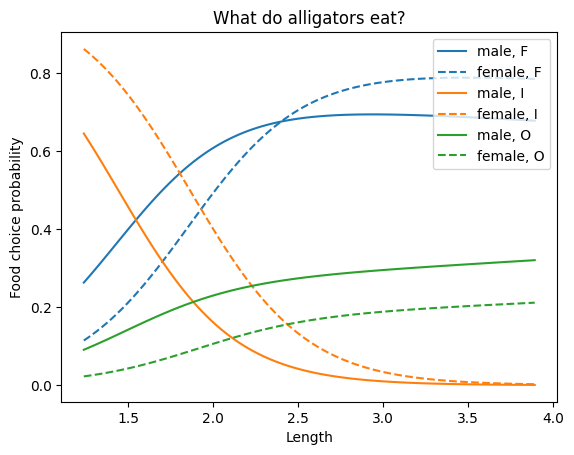

In [66]:
for j in range(3):
    plt.plot(length, W[:100, j], f"C{j}", label=f"male, {model.classes_[j]}")
    plt.plot(length, W[100:, j], f"C{j}--", label=f"female, {model.classes_[j]}")

plt.legend(loc="upper right")

plt.ylabel("Food choice probability")
plt.xlabel("Length")

plt.title("What do alligators eat?")
plt.show()

In [2]:
df = pd.read_csv("../data/alligators.csv")
df

,choice,sex,length
0,I,Male,1.30
1,F,Male,1.32
2,F,Male,1.32
3,F,Male,1.40
4,I,Male,1.42
...,...,...,...
58,O,Female,2.56
59,F,Female,2.67
60,I,Female,2.72
61,F,Female,2.79


In [6]:
import bambi as bmb
import arviz as az

model = bmb.Model("choice ~ length + sex", df, family="categorical")
fit = model.fit()
az.summary(fit)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, length, sex]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept[I],5.870,1.848,2.413,9.239,0.034,0.025,3024.0,3277.0,1.0
Intercept[O],-1.850,1.726,-5.038,1.372,0.033,0.025,2787.0,2565.0,1.0
length[I],-3.054,0.907,-4.696,-1.367,0.017,0.013,2775.0,2865.0,1.0
length[O],0.098,0.605,-1.002,1.299,0.011,0.009,3069.0,2640.0,1.0
"sex[I, Male]",-1.149,0.741,-2.477,0.228,0.012,0.009,3689.0,3018.0,1.0
"sex[O, Male]",0.606,0.891,-0.974,2.372,0.016,0.012,3188.0,2946.0,1.0


NameError: name 'az' is not defined